<a href="https://colab.research.google.com/github/lephuocdat2000/NhapmonCV/blob/master/Deadline%20Do%20hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
import cv2
import sys
import matplotlib.pyplot as plt
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib

In [79]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/drive/MyDrive/Pretrained/shape_predictor_68_face_landmarks.dat')
fullboydetector = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_fullbody.xml')

In [82]:
image_path = '/content/face-beauty-skin-face2-proc.jpg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
def Face_Detection(gray):
   image_temp = image.copy()
   faces = detector(gray)
   for face in faces: 
      x1=face.left()
      y1=face.top()
      x2=face.right()
      y2=face.bottom()
      landmarks = predictor(gray,face)
      for i in range(0,68):
         x = landmarks.part(i).x
         y = landmarks.part(i).y
         cv2.circle(image_temp,(x,y),10,(255,0,0),-1)
      cv2.rectangle(image_temp,(x1,y1),(x2,y2),(0,255,0),5)
   return cv2.cvtColor(image_temp,cv2.COLOR_BGR2RGB)
def Fullbody_Detection(gray,image):
    image_temp = image.copy()
    body = fullboydetector.detectMultiScale(gray)
    for (a,b,c,d) in body:
       cv2.rectangle(image_temp,(a,b),(a+c,b+d),(0,0,255),2)
    return cv2.cvtColor(image_temp,cv2.COLOR_BGR2RGB)

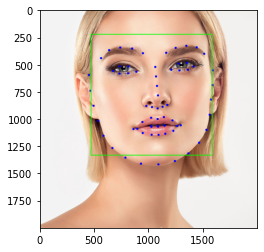

In [78]:
face = Face_Detection(image)
plt.imshow(face)
plt.show()

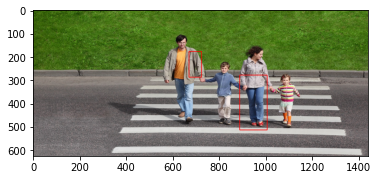

In [83]:
img_path = '/content/Pesdestrain-safety-in-Dubai-23rd-June.jpg'
img_pedestrian = cv2.imread(img_path)
gray = cv2.cvtColor(img_pedestrian,cv2.COLOR_BGR2GRAY)
full_body = Fullbody_Detection(gray,img_pedestrian)
plt.imshow(full_body)
plt.show()